In [75]:
# import neccessary packages for data handling

import pandas as pd
import numpy as np

# import neccessary packages for plots and visualizations

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
# import/read basketball data

basketball = pd.read_csv('Basketball.csv')

In [77]:
# overview of the data

basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [78]:
basketball['LaunchYear'] = basketball['TeamLaunch'].str[:4]
basket_ball = basketball.drop(['TeamLaunch'], axis =1)

In [79]:
# lets check the data now
basket_ball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld,LaunchYear
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1,1929
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1,1929
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1,1929
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1,1931
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1,1929


In [80]:
# check the column names and data types
basket_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  HighestPositionHeld  61 non-null     int64 
 12  LaunchYear           61 non-null     object
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [81]:
# rename the column
basket_ball = basket_ball.rename(columns = {'Runner-up': 'RunnerUp'})

In [82]:
# except the first column name, i.e Team, convert all the other columns to numeric data type
# we use apply function to perform the conversion using pd.to_numeric

columns = basket_ball.columns.difference(['Team']) # Team column is object type only

# During data inspection, we have found that inplace of null values, we have '-' in the data.
# Its an object type so cannot be converted to numeric data.
# First replace all '-' with 0.
basket_ball[columns] = basket_ball[columns].replace('-',0)

In [83]:
# now perform the data conversion.

basket_ball[columns] = basket_ball[columns].apply(pd.to_numeric)

In [84]:
# lets check the data type and column names
basket_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  RunnerUp             61 non-null     int64 
 11  HighestPositionHeld  61 non-null     int64 
 12  LaunchYear           61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


In [85]:
basket_ball.head(30)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,HighestPositionHeld,LaunchYear
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1,1929
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1,1929
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1,1929
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1,1931
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1,1929
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1,1934
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,3,1929
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1,1929
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,2,1939
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1,1932


In [86]:
basket_ball.describe(include = 'all').round(0).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Team,61,61,Team 44,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tournament,61,NaN,NaN,NaN,24,27,1,4,12,38,86
Score,61,NaN,NaN,NaN,901,1135,0,96,375,1351,4385
PlayedGames,61,NaN,NaN,NaN,797,876,0,114,423,1318,2762
WonGames,61,NaN,NaN,NaN,304,407,0,34,123,426,1647
DrawnGames,61,NaN,NaN,NaN,189,202,0,24,95,330,633
LostGames,61,NaN,NaN,NaN,304,295,0,62,197,563,1070
BasketScored,61,NaN,NaN,NaN,1140,1507,0,153,430,1642,5947
BasketGiven,61,NaN,NaN,NaN,1140,1164,0,221,632,1951,3889
TournamentChampion,61,NaN,NaN,NaN,1,5,0,0,0,0,33


In [1]:
# Since in the above option we have limited stats available. so we will create a UDF to create data audit report

# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [88]:
cont_var = basket_ball.select_dtypes(include = ['int64'])

In [89]:
cont_var.apply(continuous_var_summary).round(1).T # alternate for .describe()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Tournament,61.0,0.0,1464.0,24.0,12.0,26.8,719.7,1.0,1.0,1.0,2.0,4.0,12.0,38.0,73.0,82.0,86.0,86.0
Score,61.0,0.0,54987.0,901.4,375.0,1134.9,1287996.0,0.0,8.4,22.0,40.0,96.0,375.0,1351.0,2792.0,3386.0,4311.2,4385.0
PlayedGames,61.0,0.0,48606.0,796.8,423.0,876.3,767871.5,0.0,18.0,30.0,54.0,114.0,423.0,1318.0,2408.0,2664.0,2762.0,2762.0
WonGames,61.0,0.0,18542.0,304.0,123.0,407.0,165641.7,0.0,3.0,7.0,13.0,34.0,123.0,426.0,948.0,1209.0,1607.4,1647.0
DrawnGames,61.0,0.0,11525.0,188.9,95.0,201.8,40723.0,0.0,2.4,6.0,11.0,24.0,95.0,330.0,552.0,598.0,622.8,633.0
LostGames,61.0,0.0,18529.0,303.8,197.0,294.7,86853.2,0.0,9.0,19.0,30.0,62.0,197.0,563.0,766.0,861.0,980.0,1070.0
BasketScored,61.0,0.0,69561.0,1140.3,430.0,1506.7,2270266.1,0.0,20.4,37.0,62.0,153.0,430.0,1642.0,3609.0,4534.0,5918.8,5947.0
BasketGiven,61.0,0.0,69554.0,1140.2,632.0,1163.7,1354222.7,0.0,33.0,65.0,115.0,221.0,632.0,1951.0,3140.0,3373.0,3775.6,3889.0
TournamentChampion,61.0,0.0,87.0,1.4,0.0,5.5,29.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,28.2,33.0
RunnerUp,61.0,0.0,86.0,1.4,0.0,4.5,20.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,23.8,25.0


## Univariate distributions

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


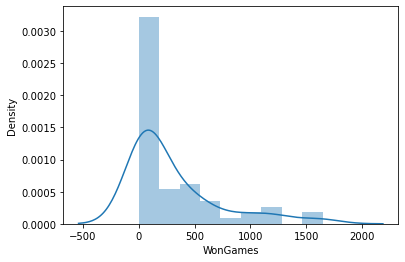

In [90]:
sns.distplot(basket_ball['WonGames'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


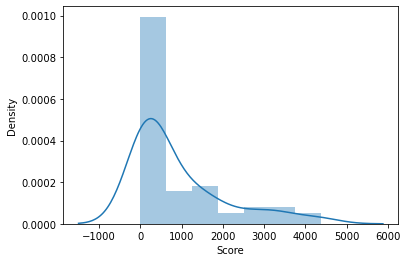

In [91]:
sns.distplot(basket_ball['Score'])
plt.show()

## Bivariate distributions

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


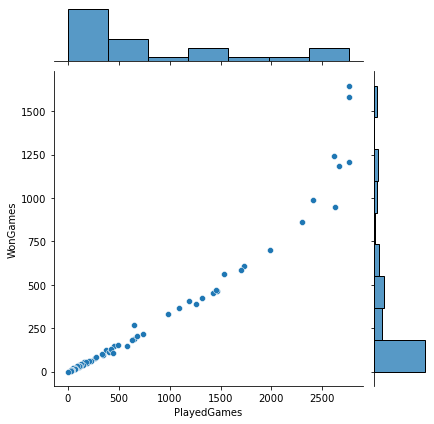

In [92]:
sns.jointplot(basket_ball['PlayedGames'], basket_ball['WonGames']);

## Pairwise distribustion

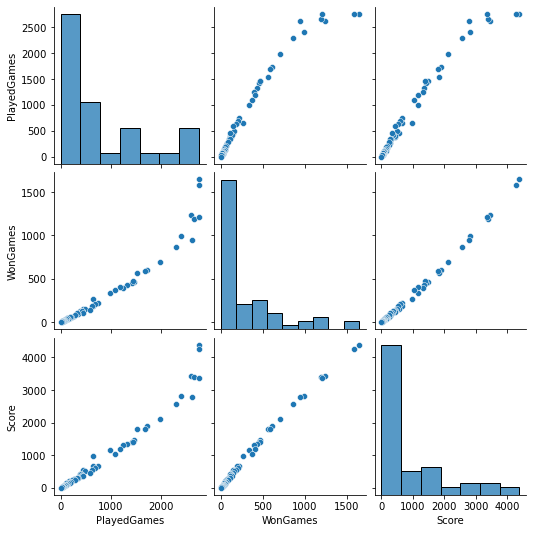

In [93]:
sns.pairplot(basket_ball[['PlayedGames', 'WonGames', 'Score']]);

<AxesSubplot:>

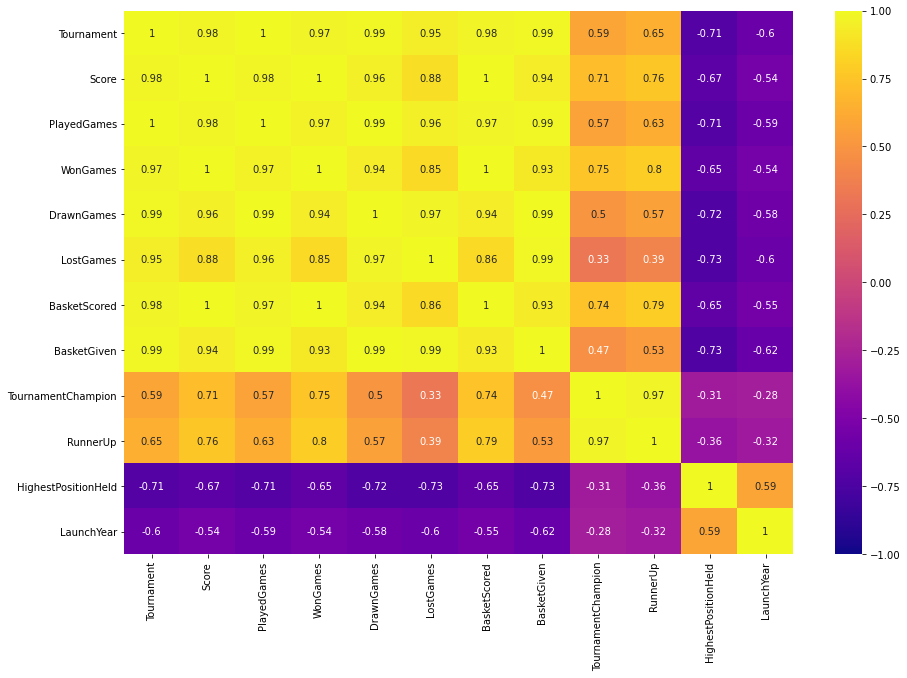

In [94]:
# For complete data
# use correlation matrix

corr = basket_ball.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='plasma',vmin=-1,vmax=1)

In [95]:
# Create some new features in the data

basket_ball["WinRate"] = basket_ball["WonGames"]/basket_ball["PlayedGames"]
basket_ball["LostRate"] = basket_ball["LostGames"]/basket_ball["PlayedGames"]
basket_ball["Basket_Score_Rate"] = basket_ball["BasketScored"]/(basket_ball["BasketScored"]+basket_ball["BasketGiven"])
basket_ball["Basket_Given_Rate"] = basket_ball["BasketGiven"]/(basket_ball["BasketScored"]+basket_ball["BasketGiven"])

In [96]:
basket_ball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,HighestPositionHeld,LaunchYear,WinRate,LostRate,Basket_Score_Rate,Basket_Given_Rate
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1,1929,0.596307,0.203838,0.654451,0.345549
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1,1929,0.572411,0.220130,0.654537,0.345463
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1,1929,0.474751,0.296480,0.578095,0.421905
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1,1931,0.445571,0.323198,0.559044,0.440956
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1,1929,0.437726,0.333092,0.555876,0.444124


In [115]:
# list out the Oldest teams

Oldest_Teams = basket_ball[['Team','LaunchYear','WinRate','LostRate','Basket_Score_Rate',
                            'Basket_Given_Rate']][basket_ball['LaunchYear']== basket_ball.LaunchYear.min()].round(3)
Oldest_Teams

,Team,LaunchYear,WinRate,LostRate,Basket_Score_Rate,Basket_Given_Rate
0,Team 1,1929,0.596,0.204,0.654,0.346
1,Team 2,1929,0.572,0.220,0.655,0.345
2,Team 3,1929,0.475,0.296,0.578,0.422
4,Team 5,1929,0.438,0.333,0.556,0.444
6,Team 7,1929,0.361,0.407,0.481,0.519
7,Team 8,1929,0.375,0.374,0.500,0.500
13,Team 14,1929,0.317,0.447,0.438,0.562
44,Team 45,1929,0.331,0.508,0.424,0.576
51,Team 52,1929,0.292,0.514,0.454,0.546
53,Team 54,1929,0.333,0.556,0.425,0.575


In [102]:
# Top 15 Team with highest goals

top_15_goals = basket_ball[['Team','LaunchYear','WinRate','LostRate',
             'BasketScored']].sort_values(by = ['BasketScored'],ascending = False)[:15]

top_15_goals

,Team,LaunchYear,WinRate,LostRate,BasketScored
0,Team 1,1929,0.596307,0.203838,5947
1,Team 2,1929,0.572411,0.220130,5900
4,Team 5,1929,0.437726,0.333092,4631
2,Team 3,1929,0.474751,0.296480,4534
3,Team 4,1931,0.445571,0.323198,4398
5,Team 6,1934,0.411130,0.368355,3680
6,Team 7,1929,0.361005,0.407464,3609
7,Team 8,1929,0.375326,0.374023,3228
8,Team 9,1939,0.351460,0.385700,2683
11,Team 12,1939,0.345112,0.425795,2278


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


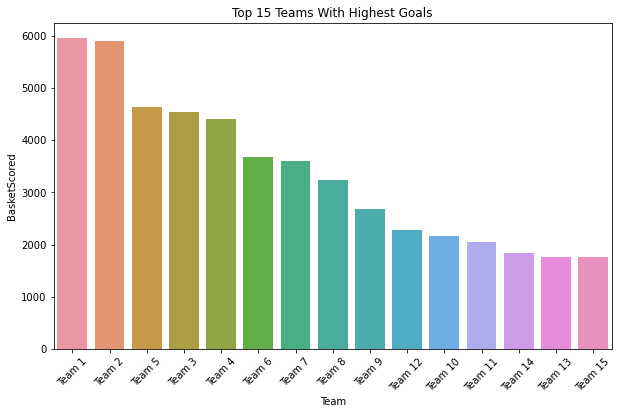

In [114]:
# use barplot to visualize the above result
plt.subplots(figsize=(10,6))
plt.title('Top 15 Teams With Highest Goals')
plt.xticks(rotation=45)
sns.barplot(top_15_goals['Team'], top_15_goals['BasketScored']);

In [117]:
# teams with lowest performance
# list out the teams with WinRate <= 30%

low_teams = basket_ball[['Team','LaunchYear','WinRate','LostRate','Basket_Score_Rate','Basket_Given_Rate'
                        ]][basket_ball['WinRate'] < 0.3].round(3).sort_values(by = 'WinRate',ascending = False)
low_teams

,Team,LaunchYear,WinRate,LostRate,Basket_Score_Rate,Basket_Given_Rate
23,Team 24,1959,0.299,0.435,0.423,0.577
21,Team 22,1941,0.294,0.470,0.414,0.586
41,Team 42,1963,0.294,0.461,0.427,0.573
25,Team 26,1935,0.293,0.470,0.405,0.595
46,Team 47,1947,0.293,0.569,0.380,0.620
51,Team 52,1929,0.292,0.514,0.454,0.546
37,Team 38,1962,0.291,0.486,0.399,0.601
30,Team 31,1974,0.291,0.468,0.421,0.579
22,Team 23,1977,0.290,0.468,0.411,0.589
40,Team 41,1971,0.289,0.466,0.411,0.589


In [121]:
# In order to find out the list of the teams to which Company X can approach, first figure out the teams
# who have won the tournament or atleast reached in the finals. Then we will go with the teams with highest WinRate.


team_list = basket_ball[(basket_ball.TournamentChampion > 0) | (basket_ball.RunnerUp > 0) ]
team_list

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,HighestPositionHeld,LaunchYear,WinRate,LostRate,Basket_Score_Rate,Basket_Given_Rate
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1,1929,0.596307,0.203838,0.654451,0.345549
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1,1929,0.572411,0.220130,0.654537,0.345463
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1,1929,0.474751,0.296480,0.578095,0.421905
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1,1931,0.445571,0.323198,0.559044,0.440956
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1,1929,0.437726,0.333092,0.555876,0.444124
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1,1934,0.411130,0.368355,0.521764,0.478236
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1,1929,0.375326,0.374023,0.499845,0.500155
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,2,1939,0.351460,0.385700,0.485172,0.514828
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1,1932,0.350694,0.394676,0.464201,0.535799
10,Team 11,45,1814,1530,563,392,575,2052,2188,1,5,1,1941,0.367974,0.375817,0.483962,0.516038


In [123]:
# Summary of the team_list
team_list.drop(['Team'],axis=1).apply(continuous_var_summary).round(1).T # alternate for .describe()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Tournament,14.0,0.0,854.0,61.0,64.0,22.5,507.7,17.0,19.1,27.4,36.0,44.2,64.0,81.5,86.0,86.0,86.0,86.0
Score,14.0,0.0,34837.0,2488.4,2341.0,1148.0,1317881.2,970.0,976.5,1002.5,1130.7,1515.5,2341.0,3381.5,4016.0,4305.0,4369.0,4385.0
PlayedGames,14.0,0.0,28146.0,2010.4,2144.0,700.7,490963.8,646.0,704.5,938.5,1195.6,1476.0,2144.0,2651.5,2762.0,2762.0,2762.0,2762.0
WonGames,14.0,0.0,12143.0,867.4,781.0,449.0,201621.8,266.0,279.1,331.6,392.8,494.0,781.0,1203.5,1479.0,1604.1,1638.4,1647.0
DrawnGames,14.0,0.0,6542.0,467.3,526.5,146.1,21357.3,172.0,181.1,217.5,270.2,366.5,526.5,576.0,610.6,622.0,630.8,633.0
LostGames,14.0,0.0,9461.0,675.8,660.5,191.4,36643.1,208.0,244.3,389.4,509.8,583.2,660.5,839.5,879.2,898.6,915.7,920.0
BasketScored,14.0,0.0,45047.0,3217.6,2955.5,1656.9,2745381.6,892.0,951.2,1187.8,1468.8,1895.2,2955.5,4500.0,5519.3,5916.5,5940.9,5947.0
BasketGiven,14.0,0.0,37917.0,2708.4,2980.5,801.9,643051.6,789.0,913.4,1411.1,1867.8,2233.0,2980.5,3289.2,3440.2,3549.8,3670.0,3700.0
TournamentChampion,14.0,0.0,87.0,6.2,1.0,10.3,106.2,0.0,0.0,0.0,0.0,0.0,1.0,7.5,20.5,27.8,32.0,33.0
RunnerUp,14.0,0.0,86.0,6.1,3.5,8.0,63.8,0.0,0.1,0.6,1.0,1.0,3.5,6.8,18.5,23.7,24.7,25.0


In [136]:
final_list = team_list[["Team","Tournament","PlayedGames","WinRate","LostRate","LaunchYear",
           "TournamentChampion","RunnerUp"]].sort_values(by = 'TournamentChampion', ascending = False)
final_list

,Team,Tournament,PlayedGames,WinRate,LostRate,LaunchYear,TournamentChampion,RunnerUp
0,Team 1,86,2762,0.596307,0.203838,1929,33,23
1,Team 2,86,2762,0.572411,0.220130,1929,25,25
2,Team 3,80,2614,0.474751,0.296480,1929,10,8
4,Team 5,86,2762,0.437726,0.333092,1929,8,7
3,Team 4,82,2664,0.445571,0.323198,1931,6,6
7,Team 8,70,2302,0.375326,0.374023,1929,2,3
5,Team 6,73,2408,0.411130,0.368355,1934,1,4
9,Team 10,51,1728,0.350694,0.394676,1932,1,0
10,Team 11,45,1530,0.367974,0.375817,1941,1,5
8,Team 9,58,1986,0.351460,0.385700,1939,0,1


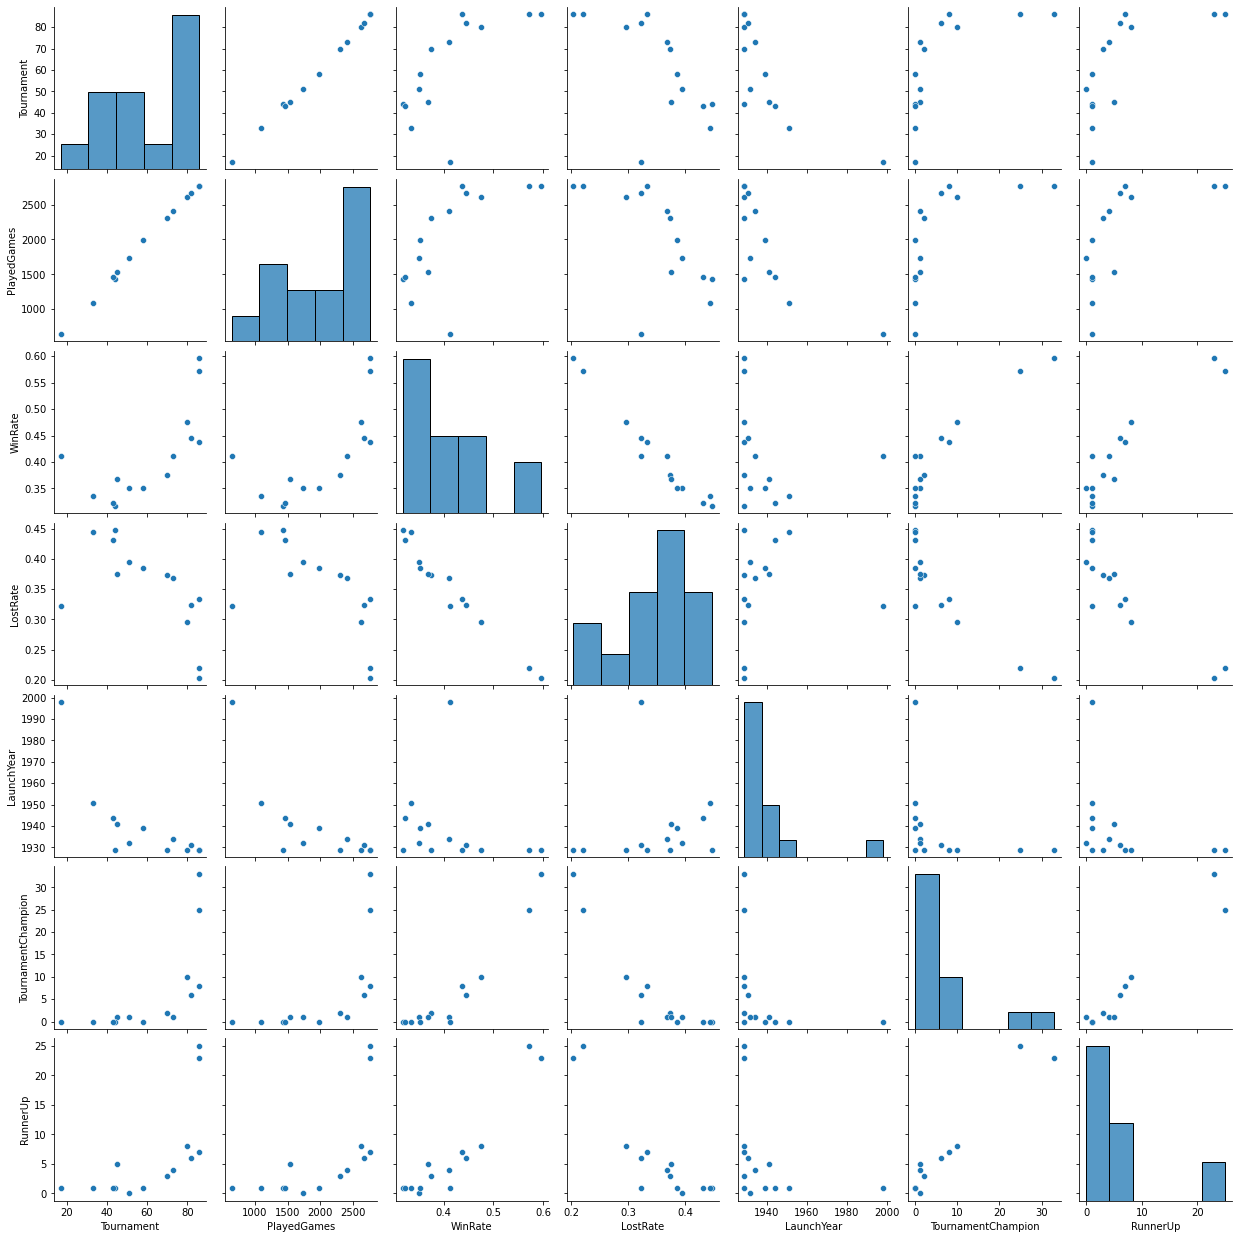

In [138]:
sns.pairplot(final_list)

In [139]:
# from the final list we can see that WinRate is somewhat directly proportional to TournamentChampion and RunnerUp

# here is the list of teams to which Company X can approach.

final_list['Team'].values

array(['Team 1', 'Team 2', 'Team 3', 'Team 5', 'Team 4', 'Team 8',
       'Team 6', 'Team 10', 'Team 11', 'Team 9', 'Team 14', 'Team 15',
       'Team 20', 'Team 21'], dtype=object)

### Although teams 9, 14, 15, 20, and 21 never won any tournament but being in the final game with higher rate of Win, there is chance that these teams can also win the tournament and if other teams are already in contract with competitors, Company X can approach these teams also.

### Suggestions to the association managemnet on the data points collected.

* Please include total fouls made by team, total goals of the opponent due to three consecutive fouls.
* Please include min, max, and average age of players.
* Please include Average Efficiency of the players.